## 多层感知机（MLP）
#### 动手学深度学习 —— MLP
#### 使用 Pytorch 实现——yujia

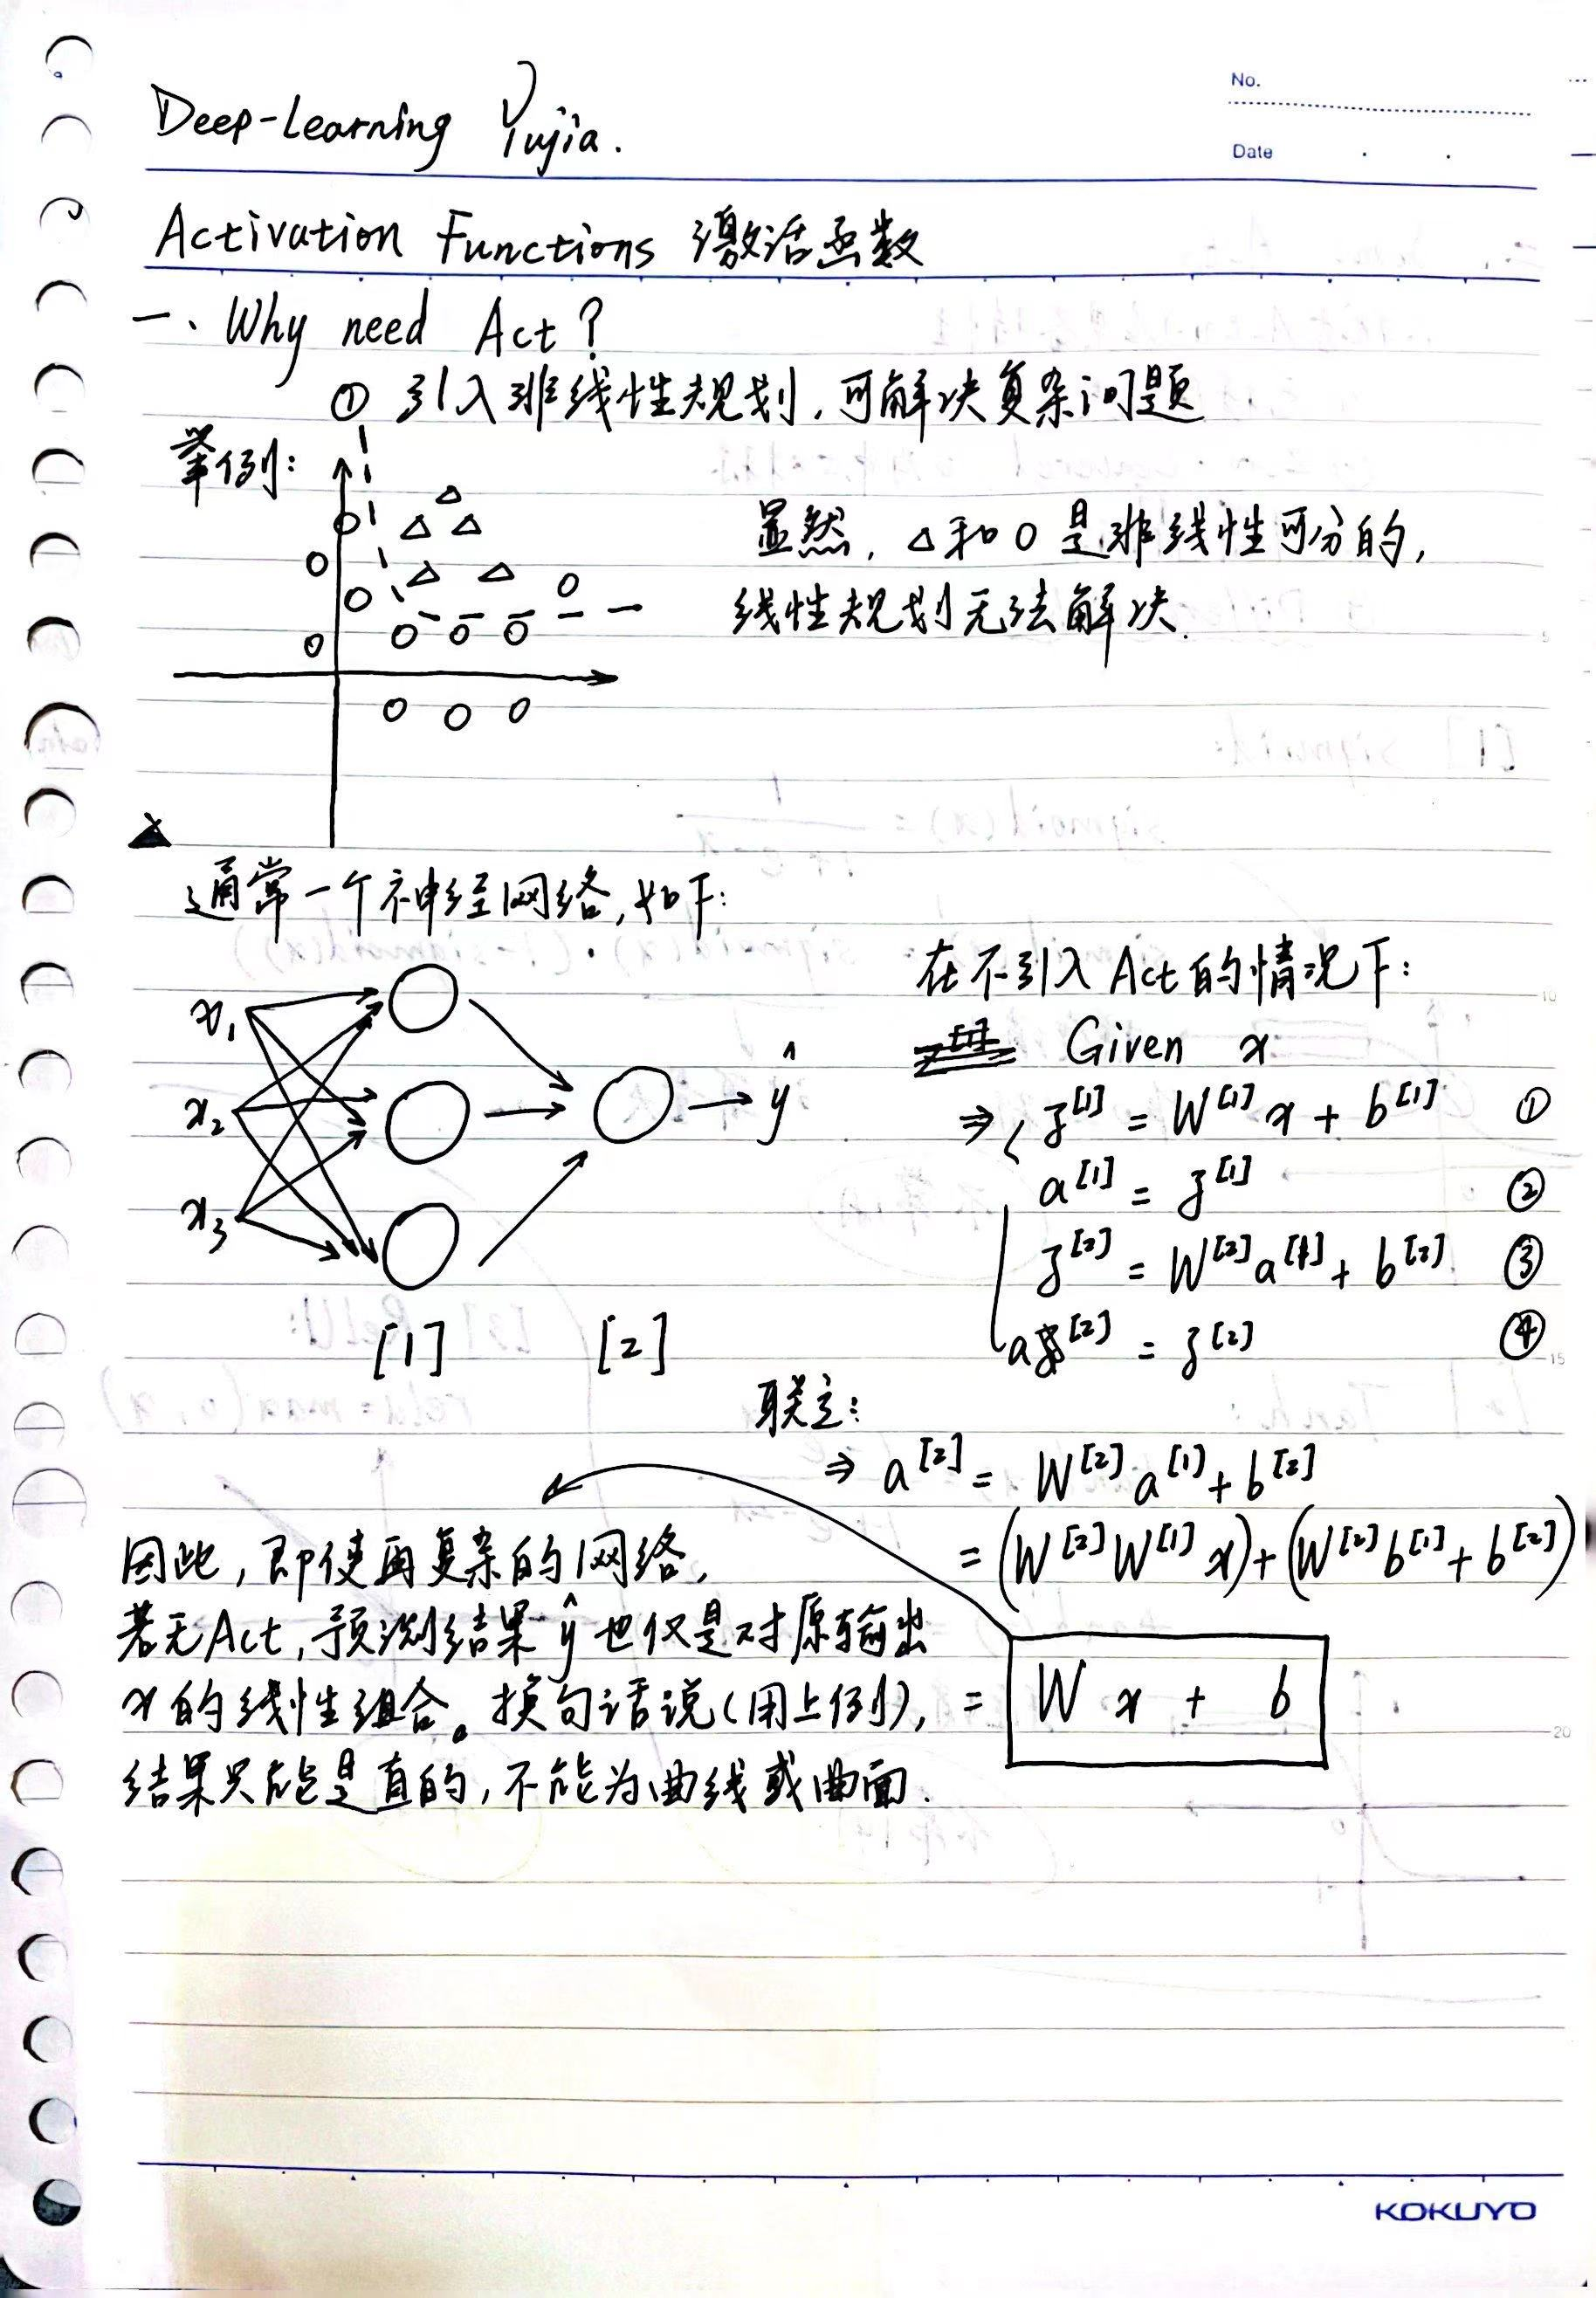

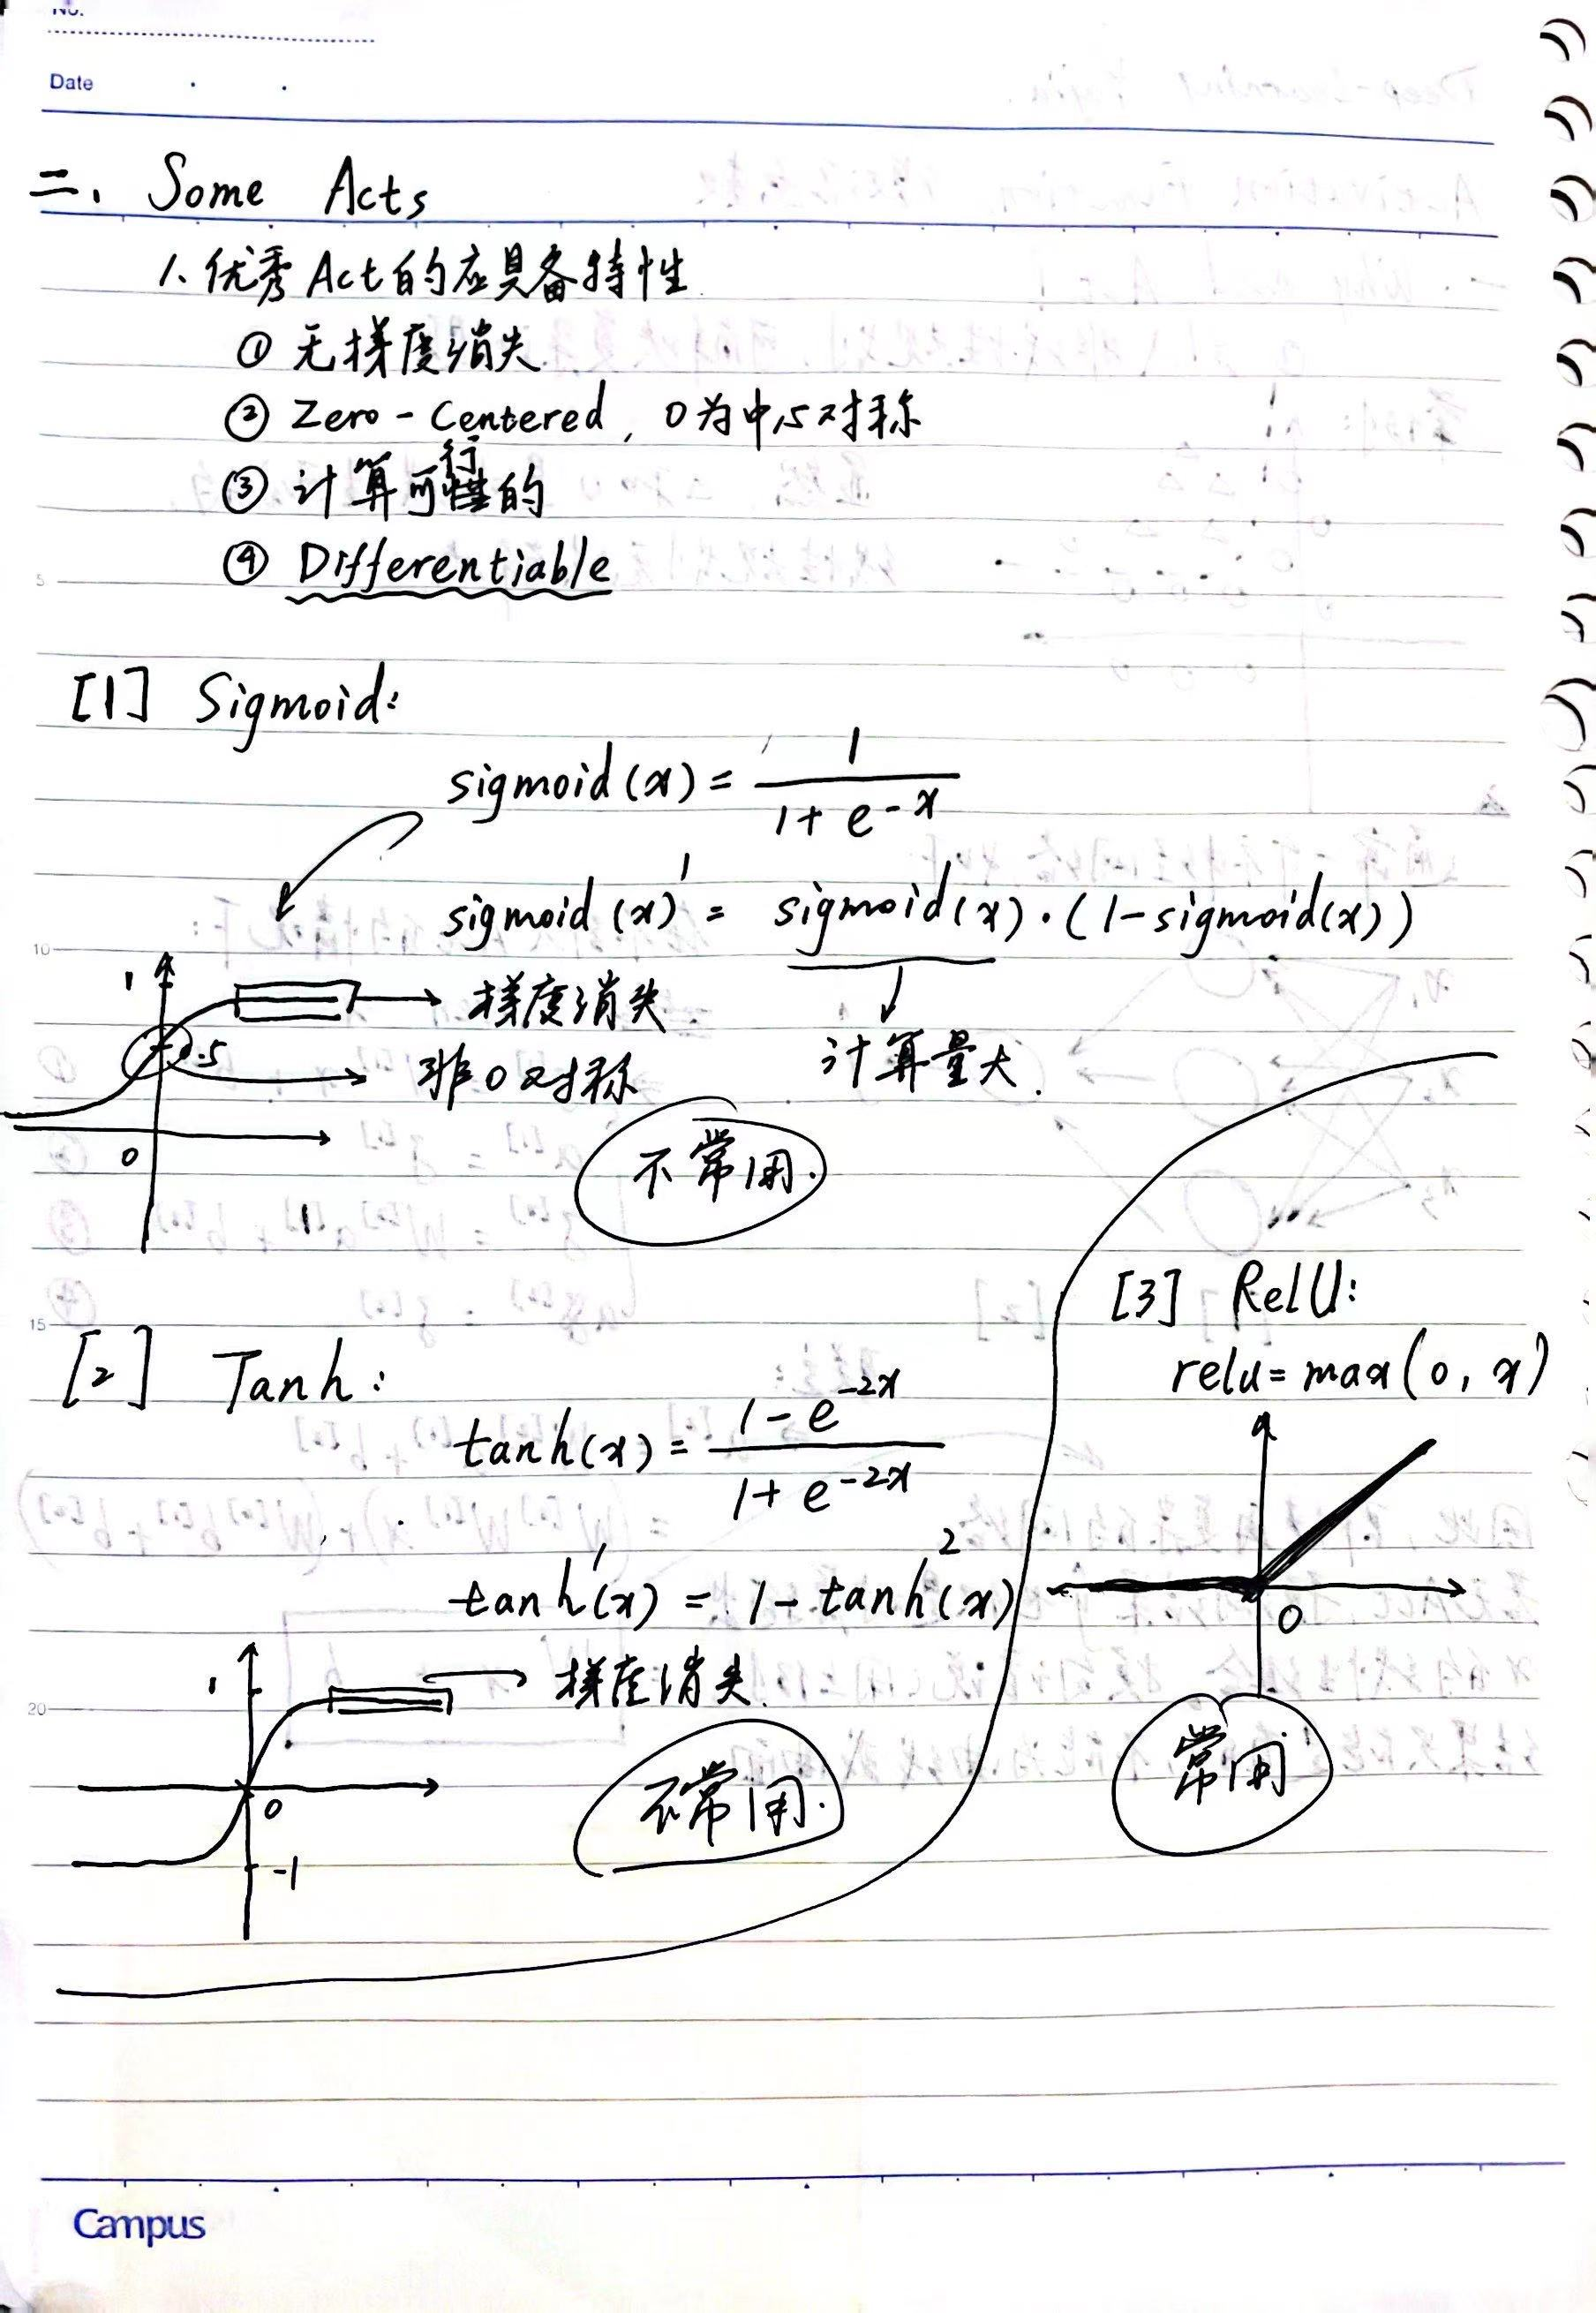

In [5]:
import numpy as np
from matplotlib import pyplot as plt
from IPython import display
import random
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
import torchvision
import torchvision.transforms as transforms

#### 数据集

In [6]:
train_set = torchvision.datasets.FashionMNIST(
    root = './Dataset',
    train = True,
    download = True,
    transform = transforms.ToTensor()
)
test_set = torchvision.datasets.FashionMNIST(
    root = './Dataset',
    train = False,
    download = True,
    transform = transforms.ToTensor()
)

In [10]:
batch_size = 64
num_workers = 2
classes = train_set.classes

train_iter = DataLoader(
    dataset = train_set,
    batch_size = batch_size,
    shuffle = True,
    num_workers = num_workers,
    drop_last = True
)

test_iter = DataLoader(
    dataset = test_set,
    batch_size = batch_size,
    shuffle = True,
    num_workers = num_workers,
    drop_last = True
)

#### 网络

In [13]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.hidden_layer = nn.Sequential(
            nn.Linear(28*28, 28*28),
            nn.ReLU()
        )
        self.softmax = nn.Sequential(
            nn.Linear(28*28, 10),
            nn.Softmax(1)
        )
    def forward(self, x):
        x = self.hidden_layer(x)
        y = self.softmax(x)
        return y
model = MLP()
print(model)

MLP(
  (hidden_layer): Sequential(
    (0): Linear(in_features=784, out_features=784, bias=True)
    (1): ReLU()
  )
  (softmax): Sequential(
    (0): Linear(in_features=784, out_features=10, bias=True)
    (1): Softmax(dim=1)
  )
)


In [18]:
def NetInit(m):
    if type(m) == nn.Linear:
        torch.nn.init.normal_(m.weight, mean=0, std=0.01)
model.apply(NetInit)

MLP(
  (hidden_layer): Sequential(
    (0): Linear(in_features=784, out_features=784, bias=True)
    (1): ReLU()
  )
  (softmax): Sequential(
    (0): Linear(in_features=784, out_features=10, bias=True)
    (1): Softmax(dim=1)
  )
)

In [22]:
learning_rate = 0.1
opt = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [23]:
loss = torch.nn.CrossEntropyLoss()

In [24]:
num_epochs = 30
acc_list, loss_list = [], []

for epoch in range(1, num_epochs+1):
    loss_sum, acc_sum = 0.0, 0.0
    n = 0
    for step, (X, y) in enumerate(train_iter):
        pred = model(X.squeeze().view(batch_size,28*28))
        l = loss(pred,y).sum()
        opt.zero_grad()
        l.backward()
        opt.step()
        loss_sum += l
        acc_sum += (pred.argmax(axis=1) == y).sum()
        n+=len(y)
    loss_list.append(loss_sum/n)
    acc_list.append(acc_sum/n)
    print("epoch: %d, loss: %.4f, train_acc: %.4f" % (epoch, loss_sum/n, acc_sum/n))

epoch: 1, loss: 0.0261, train_acc: 0.8028
epoch: 2, loss: 0.0260, train_acc: 0.8076
epoch: 3, loss: 0.0259, train_acc: 0.8112
epoch: 4, loss: 0.0258, train_acc: 0.8136
epoch: 5, loss: 0.0258, train_acc: 0.8163
epoch: 6, loss: 0.0258, train_acc: 0.8175
epoch: 7, loss: 0.0257, train_acc: 0.8193
epoch: 8, loss: 0.0257, train_acc: 0.8214
epoch: 9, loss: 0.0257, train_acc: 0.8232
epoch: 10, loss: 0.0257, train_acc: 0.8239
epoch: 11, loss: 0.0256, train_acc: 0.8254
epoch: 12, loss: 0.0256, train_acc: 0.8267
epoch: 13, loss: 0.0256, train_acc: 0.8270
epoch: 14, loss: 0.0256, train_acc: 0.8272
epoch: 15, loss: 0.0256, train_acc: 0.8291
epoch: 16, loss: 0.0256, train_acc: 0.8296
epoch: 17, loss: 0.0255, train_acc: 0.8300
epoch: 18, loss: 0.0255, train_acc: 0.8313
epoch: 19, loss: 0.0255, train_acc: 0.8315
epoch: 20, loss: 0.0255, train_acc: 0.8332
epoch: 21, loss: 0.0255, train_acc: 0.8328
epoch: 22, loss: 0.0255, train_acc: 0.8337
epoch: 23, loss: 0.0255, train_acc: 0.8347
epoch: 24, loss: 0.0

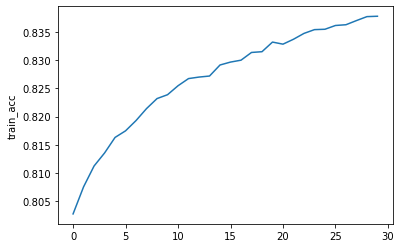

In [25]:
plt.ylabel('train_acc')
plt.plot(range(len(acc_list)),acc_list)